In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

In [37]:
df1 = pd.read_csv('2014년 졸음운전 교통사고.csv', engine='python', index_col='구분', dtype={'사고(건)':int, '사망(명)':int, '부상(명)':int} )
df2 = pd.read_csv('2015년 졸음운전 교통사고.csv', engine='python', index_col='구분', dtype={'사고(건)':int, '사망(명)':int, '부상(명)':int} )
df3 = pd.read_csv('2016년 졸음운전 교통사고.csv', engine='python', index_col='구분', dtype={'사고(건)':int, '사망(명)':int, '부상(명)':int} )
df1

사고(건)  사망(명)  부상(명)
구분                           
2014년1월     169      7    347
2014년2월     145      3    268
2014년3월     206     12    358
2014년4월     182      4    360
2014년5월     218     17    474
2014년6월     233     13    457
2014년7월     229     14    431
2014년8월     222      9    447
2014년9월     225     15    430
2014년10월    210     14    392
2014년11월    209     10    386
2014년12월    178     12    329

In [44]:
#1. 년도, 월별로 인덱스를 설정하고 데이터를 보여 주시요
df = pd.concat( [df1, df2, df3] )
df['년도'] = df.index.str[0:4]
df['월'] = df.index.str[5:]
df.reset_index(drop=True, inplace=True)
df = df.pivot_table( index=['년도', '월'] )
df

부상(명)  사고(건)  사망(명)
년도   월                       
2014 10월    392    210     14
     11월    386    209     10
     12월    329    178     12
     1월     347    169      7
     2월     268    145      3
     3월     358    206     12
     4월     360    182      4
     5월     474    218     17
     6월     457    233     13
     7월     431    229     14
     8월     447    222      9
     9월     430    225     15
2015 10월    475    214     14
     11월    398    199      3
     12월    428    213      8
     1월     375    205      8
     2월     375    175      8
     3월     492    237      4
     4월     486    227     10
     5월     504    231      9
     6월     401    207      8
     7월     556    273      7
     8월     534    268     19
     9월     501    252     10
2016 10월    367    183     10
     11월    418    200      5
     12월    364    168      4
     1월     387    192      5
     2월     328    174      6
     3월     435    217      7
     4월     419    216      7
     5월     522    239     13
     6월     362    200     12
     7월     460    227      9
     8월     490    230      7
     9월     347    187     13

In [53]:
#2. 2016년 사고대비 사망율을 보여 주시요
df2016 = df.loc['2016']
df2016['사망율'] = df2016['사망(명)']/df2016['사고(건)'] * 100
df2016

부상(명)  사고(건)  사망(명)       사망율
월                                 
10월    367    183     10  5.464481
11월    418    200      5  2.500000
12월    364    168      4  2.380952
1월     387    192      5  2.604167
2월     328    174      6  3.448276
3월     435    217      7  3.225806
4월     419    216      7  3.240741
5월     522    239     13  5.439331
6월     362    200     12  6.000000
7월     460    227      9  3.964758
8월     490    230      7  3.043478
9월     347    187     13  6.951872

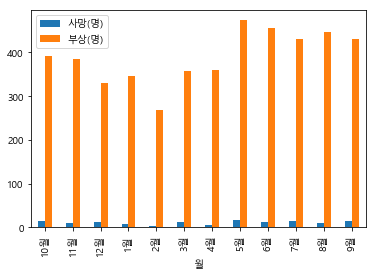

In [54]:
#3. 2014년도 월별 사망, 부상 데이터를 바차트로 보여주시요
df.loc['2014'][ ['사망(명)', '부상(명)'] ].plot(kind='bar')
plt.show()

In [ ]:
#4. 2015년 대비  사망이 가장 많이 증가한 2016년 도 월을 구하시요
